Useful links:
- https://docs.nvidia.com/nsight-compute/NsightComputeCli/index.html#nvprof-metric-comparison
- https://docs.nvidia.com/cuda/profiler-users-guide/index.html#metrics-reference-7x
- https://canvas.kth.se/courses/36161/assignments/223741
- https://canvas.kth.se/courses/36161/pages/tutorial-timing-your-kernel-cpu-timer-and-nvprof?module_item_id=561394

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Mon Nov 28 13:58:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_4/ex_2'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_3/ex_1
hw3_ex1_first_cuda_program.ipynb  lab3_ex1  lab3_ex1.cu


In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!./lab4_ex2 131070

The input length is 131070.
Time Data copy (H2D): 0.000679.
Time CUDA kernel: 0.000034.
Time Data copy (D2H): 0.000790.
CPU and GPU results are equal.


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab4_ex2 131070

The input length is 131070.
==PROF== Connected to process 1029 (/content/drive/MyDrive/Colab Notebooks/DD2360 Applied GPU Programming KTH/hw_3/ex_1/lab3_ex1)
Time Data copy (H2D): 0.000726.
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
Time CUDA kernel: 0.678639.
Time Data copy (D2H): 0.000830.
CPU and GPU results are equal.
==PROF== Disconnected from process 1029
[1029] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Nov-28 13:58:42, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.19
    Elapsed Cycles                                                                   cycle                   

In [ ]:
!nvprof ./lab4_ex2 134217728

The input length is 134217728.
tcmalloc: large alloc 1073741824 bytes == 0x55d36658c000 @  0x7fad712ef1e7 0x55d363c076ae 0x7fad70320c87 0x55d363c074aa
==1039== NVPROF is profiling process 1039, command: ./lab3_ex1 134217728
Time Data copy (H2D): 0.461054.
Time CUDA kernel: 0.012298.
Time Data copy (D2H): 0.702104.
CPU and GPU results are equal.
==1039== Profiling application: ./lab3_ex1 134217728
==1039== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   59.71%  700.69ms         1  700.69ms  700.69ms  700.69ms  [CUDA memcpy DtoH]
                   39.24%  460.49ms         2  230.25ms  229.74ms  230.75ms  [CUDA memcpy HtoD]
                    1.04%  12.225ms         1  12.225ms  12.225ms  12.225ms  vecAdd(double*, double*, double*, int)
      API calls:   76.96%  1.16302s         3  387.67ms  229.98ms  702.09ms  cudaMemcpy
                   21.62%  326.71ms         3  108.90ms  1.0045ms  324.63ms  cudaMalloc
       

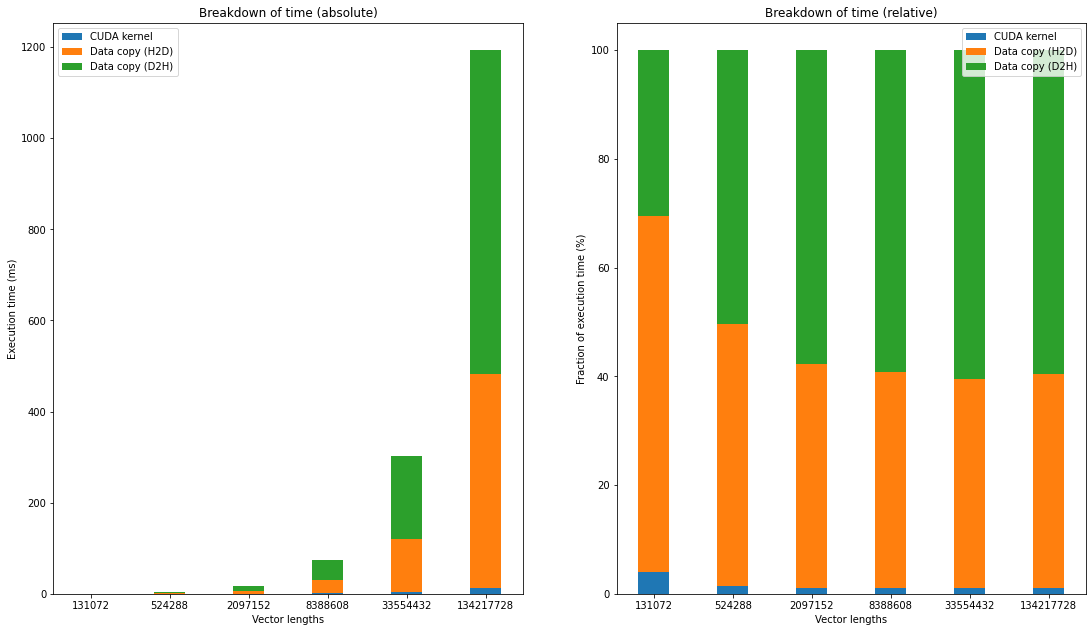

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vector_lengths = ['131072', '524288', '2097152', '8388608', '33554432', '134217728']
time_abs = np.array([82.046*10**(-3), 1.5917, 9.6424, 44.099, 182.70, 710.40])

width = 0.4
fig, ax = plt.subplots(1, 1)

ax[0].bar(vector_lengths, time_abs, width)

ax[0].set_xlabel('Vector lengths')
ax[0].set_ylabel('Execution time (ms)')
ax[0].set_title('Breakdown of time (absolute)')
ax[0].legend()

fig.set_size_inches(18.5/2, 10.5, forward=True)
plt.show()